In [311]:
import os
import pickle
import numpy as np
import torchaudio
from pathlib import Path
from vad.vad_lab import VAD

input_pkl = Path(os.getcwd()).parent / "data/input_features-train.pkl"
input_fixed_pkl = Path(os.getcwd()).parent / "data/input_features-train-fixed.pkl"

input_features = {}

try:
    with open(input_pkl, "rb") as pkl:
        input_features = pickle.load(pkl)
except Exception as ex:
    print(ex)



In [312]:
def fix_input_features(input_features):
    durations = []
    fixed_input_features = {}
    inputs, labels = [], []
    stats = []
    for i, (input, label) in enumerate(zip(input_features['inputs'], input_features['labels'])):
        path = Path(os.getcwd()).parent / "audiosegments" / input
        wave, sr = torchaudio.load(path, normalize=True)
        duration = wave.shape[1] / sr
        mean = wave[0].mean().item()
        std = wave[0].std().item()
        if duration >= 3 and duration <= 6:
            if "1568_1_4_66.114_70.014_Train" in input:
                print(duration, input)
            aud = f"/Users/beltre.wilton/apps/mspconv_ftlab/audiosegments/{input}"
            aud_dB = f"/Users/beltre.wilton/apps/mspconv_ftlab/audiosegments/dBDown/{input}"
            wave, sr = torchaudio.load(aud, normalize=True)
            wave = wave.squeeze() # [c, s] => [s]
            wave = wave * 0.25
            torchaudio.save(aud_dB, wave.unsqueeze(dim=0), sample_rate=16_000, bits_per_sample=16, encoding='PCM_S')
            
            durations.append(duration)
            stats.append([mean, std])
            inputs.append(input)
            labels.append(label)
    fixed_input_features['inputs'] = inputs
    fixed_input_features['labels'] = labels
    return np.array(durations), fixed_input_features, stats

durations, fixed_input_features,  stats = fix_input_features(input_features)
oldf = len(input_features['inputs'])
newf = len(durations)
print(f"extranger length of input_features: {oldf}, fixed length input features: {newf}")

3.9 1568_1_4_66.114_70.014_Train.wav
extranger length of input_features: 12382, fixed length input features: 10216


In [201]:
stats = np.array(stats)

In [219]:
stats[:, 1]

array([0.10176846, 0.09331652, 0.10419286, ..., 0.00595648, 0.0096032 ,
       0.00502728])

In [215]:
stats[0:3, :]

array([[-1.77113016e-05,  1.01768456e-01],
       [-1.03586535e-04,  9.33165178e-02],
       [ 2.73076785e-06,  1.04192860e-01]])

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-0.00284658, -0.00284191, -0.00283723, ...,  0.094946  ,
         0.09495068,  0.09495535]),
 <BarContainer object of 20911 artists>)

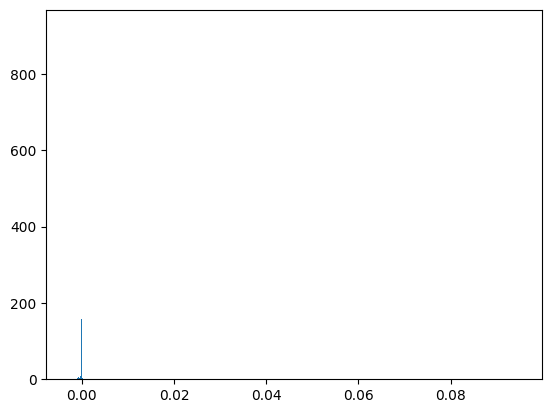

In [221]:
import matplotlib.pyplot as plt
plt.hist(stats[:, 0], bins='auto')

In [310]:

with open(input_fixed_pkl, "wb") as pkl:
    pickle.dump(fixed_input_features, pkl)
    

(array([656., 631., 613., 571., 599., 580., 529., 381., 523., 494., 414.,
        466., 421., 342., 352., 272., 373., 323., 314., 316., 313., 257.,
        255., 221.]),
 array([3.0021875 , 3.12626302, 3.25033854, 3.37441406, 3.49848958,
        3.6225651 , 3.74664062, 3.87071615, 3.99479167, 4.11886719,
        4.24294271, 4.36701823, 4.49109375, 4.61516927, 4.73924479,
        4.86332031, 4.98739583, 5.11147135, 5.23554688, 5.3596224 ,
        5.48369792, 5.60777344, 5.73184896, 5.85592448, 5.98      ]),
 <BarContainer object of 24 artists>)

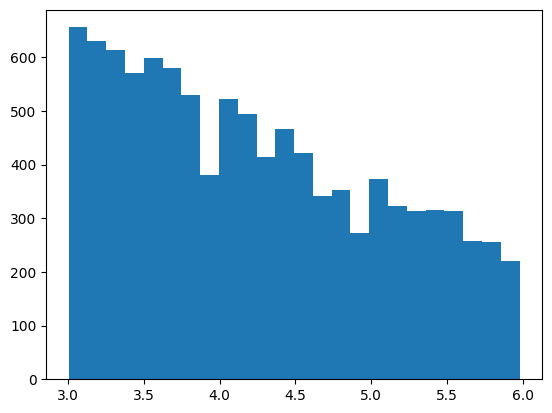

In [72]:
import matplotlib.pyplot as plt
plt.hist(durations, bins='auto')

In [256]:
vad = VAD(minmax=[-100, 100], mapping="OCC")
vad.terms
medium = {"aa": 1, "ae": 2, "ah": 3, "aw": 4, "ay": 5, "b": 6, "ch": 7, "d": 8, "dh": 9, "dx": 10, "eh": 11, "er": 12, "ey": 13, "f": 14, "g": 15, "h#": 16, "hh": 17, "ih": 18, "iy": 19, "jh": 20, "k": 21, "l": 22, "m": 23, "ng": 24, "|": 0, "[UNK]": 25, "[PAD]": 26}

all_labels = []
for label in fixed_input_features['labels']:
    all_labels.extend(label.split())

ids_labels = []
for l in all_labels:
    ids_labels.append(medium[l])

emos_labels = []
for i in ids_labels:
    emos_labels.append(vad.terms[i-1])



In [257]:
np.vstack((ids_labels, emos_labels))

array([['24', '24', '24', ..., '12', '12', '12'],
       ['NEUTRAL', 'NEUTRAL', 'NEUTRAL', ..., 'HOPE', 'HOPE', 'HOPE']],
      dtype='<U21')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'NEUTRAL'),
  Text(1, 0, 'LOVE'),
  Text(2, 0, 'PRIDE'),
  Text(3, 0, 'SATISFACTION'),
  Text(4, 0, 'RESENTMENT'),
  Text(5, 0, 'REPROACH'),
  Text(6, 0, 'PITY'),
  Text(7, 0, 'DISLIKING'),
  Text(8, 0, 'ANGER'),
  Text(9, 0, 'GLOATING'),
  Text(10, 0, 'HOPE'),
  Text(11, 0, 'HAPPY FOR?'),
  Text(12, 0, 'HATE'),
  Text(13, 0, 'JOY'),
  Text(14, 0, 'DISAPPOINTMENT'),
  Text(15, 0, 'LIKING'),
  Text(16, 0, 'GRATITUDE'),
  Text(17, 0, 'RELIEF'),
  Text(18, 0, 'ADMIRATION'),
  Text(19, 0, 'DISTRESS'),
  Text(20, 0, 'GRATIFICATION')])

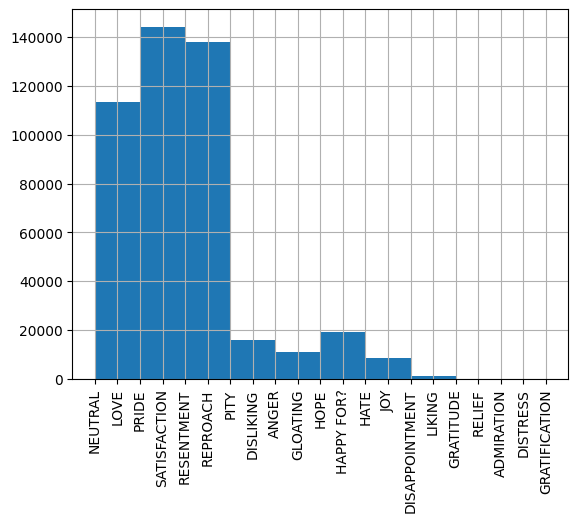

In [268]:
import pandas as pd

ids_labels
ids_labels_df = pd.DataFrame(np.vstack((ids_labels, emos_labels))).T
ids_labels_df[1].hist()
plt.xticks(rotation='vertical')


In [116]:
Path(os.getcwd()).parent / 'data/wadf.pkl'

PosixPath('/Users/beltre.wilton/apps/mspconv_ftlab/data/wadf.pkl')

In [119]:
mspconvs = {}
try:
    with open(Path(os.getcwd()).parent / 'data/mspconvs.pkl', "rb") as pkl:
        mspconvs = pickle.load(pkl)
except Exception as ex:
    print(ex)

In [159]:
part = '1159_1'
wadf[f'{part}_Valence']

,Time,Annotator,Annotation
0,0.040000,WAvg,NaN
1,0.041000,WAvg,-0.152805
2,0.056068,WAvg,-0.152805
3,0.057015,WAvg,-0.152805
4,0.058019,WAvg,-0.152805
...,...,...,...
93847,395.923000,WAvg,-19.656023
93848,395.923100,WAvg,-19.656023
93849,395.929000,WAvg,-19.352323
93850,395.940000,WAvg,-19.352323


In [160]:
wadf[f'{part}_Dominance']

,Time,Annotator,Annotation
0,0.040000,WAvg,NaN
1,0.041000,WAvg,0.169524
2,0.057130,WAvg,0.169524
3,0.057412,WAvg,0.169524
4,0.058068,WAvg,0.169524
...,...,...,...
73196,395.923000,WAvg,43.834145
73197,395.923800,WAvg,43.834145
73198,395.931300,WAvg,43.834145
73199,395.939900,WAvg,43.834145


In [161]:
wadf[f'{part}_Arousal']

,Time,Annotator,Annotation
0,0.040000,WAvg,NaN
1,0.041000,WAvg,NaN
2,0.045000,WAvg,-0.001795
3,0.055045,WAvg,-0.001795
4,0.068794,WAvg,-0.001795
...,...,...,...
64398,395.905400,WAvg,4.807479
64399,395.920100,WAvg,4.807479
64400,395.921000,WAvg,4.807479
64401,395.932300,WAvg,4.807479


In [121]:
mspconvs['2252_2_Arousal'].keys()

dict_keys(['raters', 'annolist', 'time', 'ck_score', 'reps_score', 'reps_scaled', 'annotations'])

In [142]:
mspconvs['1140_3_Dominance']['reps_scaled'][:, 0]

array([0.        , 1.        , 0.93006077, 0.93470333, 0.8795831 ,
       0.33395073])

In [137]:
mspconvs['1140_3_Dominance']['annolist']

array(['7', '10', '13', '14', '17', '19'], dtype=object)

In [147]:
mspconvs['2_1_Arousal']['annotations'][6]

,Time,Annotator,Annotation
0,0.040000,WAvg,-0.004076
1,0.055321,WAvg,-0.004076
2,0.056279,WAvg,-0.004076
3,0.057058,WAvg,-0.004076
4,0.073993,WAvg,-0.004076
...,...,...,...
53848,284.085800,WAvg,41.434158
53849,284.086500,WAvg,41.434158
53850,284.087300,WAvg,42.081218
53851,284.095200,WAvg,42.081218


### TIMIT AREA


In [327]:
def read_text_file(filepath):
    with open(filepath) as f:
        tokens = [line.split()[-1] for line in f]
        return " ".join(tokens)

f = '/Users/beltre.wilton/apps/msp_temp/TIMIT/all_txt/SX308.PHN'
read_text_file(f)

'h# sh ih pcl b ih l dcl iy ng ix z ax m ow s f ae s n ey dx iy ng pcl p r aa s eh s h#'

In [368]:
from pathlib import Path

inputs = []
labels = []
for file in Path('/Users/beltre.wilton/apps/msp_temp/TIMIT/all_waves/train').rglob("*"):
    inputs.append(str(file))
    phn = f'/Users/beltre.wilton/apps/msp_temp/TIMIT/all_txt/train/{file.name.replace(".WAV.wav", ".PHN")}'
    label = read_text_file(phn)
    labels.append(label)



In [369]:
timit_input_features_train = {}
timit_input_features_train['inputs'] = inputs
timit_input_features_train['labels'] = labels

In [370]:
def __save_input_features(dataset_object, name):
    with open(f'/Users/beltre.wilton/apps/mspconv_ftlab/data/{name}', "wb") as pkl:
        pickle.dump(dataset_object, pkl)

__save_input_features(timit_input_features_train, "timit_input_features-train.pkl")

## Classification Area

In [28]:
import os
import pickle
import numpy as np
import torchaudio
from pathlib import Path
from vad.vad_lab import VAD

input_pkl = Path(os.getcwd()).parent / "data/class_input_features-test.pkl"
input_fixed_pkl = Path(os.getcwd()).parent / "data/class_input_features-test-fixed.pkl"

input_features = {}

try:
    with open(input_pkl, "rb") as pkl:
        input_features = pickle.load(pkl)
except Exception as ex:
    print(ex)

vad = VAD(minmax=[-100, 100], mapping="OCC")


In [29]:
inputs = []
labels = []
class_input_features_test_fixed = {}
for input, label in zip(input_features['inputs'], input_features['labels']):
    inputs.append(input)
    labels.append(vad.terms[label[0]-1])

class_input_features_test_fixed['inputs'] = inputs
class_input_features_test_fixed['labels'] = labels


In [17]:
vad.vad2categorical(0.4, 0.6, -1, k=1, use_plot=False)

([{'term': 'NEUTRAL',
   'index': 24,
   'closest': 0.012328828005937964,
   'v': 0.0,
   'a': 0.0,
   'd': 0.0}],
 {'using_dominance': True})

In [30]:
def __save_input_features(dataset_object, name):
    with open(f'/Users/beltre.wilton/apps/mspconv_ftlab/data/{name}', "wb") as pkl:
        pickle.dump(dataset_object, pkl)

__save_input_features(class_input_features_test_fixed, "class_input_features_test_fixed.pkl")

In [33]:
vad.terms

array(['ADMIRATION', 'ANGER', 'DISLIKING', 'DISAPPOINTMENT', 'DISTRESS',
       'FEAR', 'GLOATING', 'GRATIFICATION', 'GRATITUDE', 'HAPPY FOR?',
       'HATE', 'HOPE', 'JOY', 'LIKING', 'LOVE', 'PITY', 'PRIDE', 'RELIEF',
       'REMORSE', 'REPROACH', 'RESENTMENT', 'SATISFACTION', 'SHAME',
       'NEUTRAL'], dtype='<U14')

In [46]:
# print("14: ", vad.terms[14])

# for label in class_input_features_test_fixed['labels']:
#     print(label, list(vad.terms).index(label))


class_input_features_test_fixed['inputs']

['47_1_0_0.226_3.934_Test.wav',
 '47_1_1_5.378_7.55_Test.wav',
 '47_1_2_7.874_11.71_Test.wav',
 '47_1_3_12.258_15.55_Test.wav',
 '47_1_4_16.098_21.31_Test.wav',
 '47_1_5_29.73_33.022_Test.wav',
 '47_1_6_33.762_36.062_Test.wav',
 '47_1_7_36.482_39.326_Test.wav',
 '47_1_8_39.97_43.838_Test.wav',
 '47_1_9_44.162_47.518_Test.wav',
 '47_1_10_47.81_51.166_Test.wav',
 '47_1_11_51.49_55.55_Test.wav',
 '47_1_12_55.874_60.734_Test.wav',
 '47_1_13_61.186_65.95_Test.wav',
 '47_1_14_66.146_70.366_Test.wav',
 '47_1_15_70.562_75.55_Test.wav',
 '47_1_16_75.906_78.782_Test.wav',
 '47_1_17_79.202_83.102_Test.wav',
 '47_1_18_83.234_86.878_Test.wav',
 '47_1_19_87.17_93.118_Test.wav',
 '47_1_20_103.394_108.446_Test.wav',
 '47_1_21_115.138_120.254_Test.wav',
 '47_1_22_120.45_123.486_Test.wav',
 '47_1_23_138.338_141.758_Test.wav',
 '47_1_24_141.89_146.942_Test.wav',
 '47_1_25_147.298_152.574_Test.wav',
 '47_1_26_152.93_157.95_Test.wav',
 '47_1_27_165.794_171.166_Test.wav',
 '47_1_28_171.778_177.534_Test.wav'